In [1]:
# %% FIGURE 1 - LIVE IMAGING OF SEIZURES IN AWAKE ANIMALS
import sys
sys.path.extend(['/home/pshah/Documents/code/AllOpticalSeizure', '/home/pshah/Documents/code/AllOpticalSeizure'])
sys.path.extend(['/home/pshah/Documents/code/reproducible_figures-main'])

import numpy as np
import matplotlib.pyplot as plt


from _exp_metainfo_.exp_metainfo import fontsize_extraplot


from _analysis_.sz_analysis._ClassSuite2pROIsSzAnalysis import Suite2pROIsSz, Suite2pROIsSzResults
from _results_.sz4ap_results import plotHeatMapSzAllCells
from _analysis_.sz_analysis._ClassExpSeizureAnalysis import ExpSeizureResults


from _utils_.io import import_expobj
from _utils_.alloptical_plotting import save_figure
import funcsforprajay.plotting as pplot
import numpy as np
from scipy import stats

from _main_.Post4apMain import Post4ap

import rep_fig_vis as rfv

SAVE_FOLDER = f'/home/pshah/Documents/figures/alloptical_seizures_draft/'
fig_items = f'/home/pshah/Documents/figures/alloptical_seizures_draft/figure-items/'

results = Suite2pROIsSzResults.load()
results_seizure: ExpSeizureResults = ExpSeizureResults.load()

expobj: Post4ap = import_expobj(exp_prep='RL108 t-013')



importing resultsobj from: /home/pshah/mnt/qnap/Analysis/alloptical_results_superobject.pkl ... 
|-DONE IMPORT of <class 'alloptical_utils_pj.AllOpticalResults'> resultsobj 



importing resultsobj from: /home/pshah/mnt/qnap/Analysis/alloptical_results_superobject.pkl ... 
|-DONE IMPORT of <class 'alloptical_utils_pj.AllOpticalResults'> resultsobj 


Loading Results Analysis object from /home/pshah/mnt/qnap/Analysis/analysis_export/analysis_quantification_classes/Results__ExpSeizure.pkl ... 
Loading Results Analysis object from /home/pshah/mnt/qnap/Analysis/analysis_export/analysis_quantification_classes/Results__Suite2pROIsSz.pkl ... 
Loading Results Analysis object from /home/pshah/mnt/qnap/Analysis/analysis_export/analysis_quantification_classes/Results__ExpSeizure.pkl ... 
Python 3.9.7 (default, Sep 16 2021, 13:09:58) 12-18/RL108/2020-12-18_t-013/2020-12-18_t-013.pkl
[GCC 7.5.0] on linux
Loading Results Analysis object from /home/pshah/mnt/qnap/Analysis/analysis_export/analysis_qu

In [2]:
# %% MAKE FIGURE LAYOUT
%matplotlib agg
%matplotlib agg

rfv.set_fontsize(fontsize_extraplot)

# set layout of the figure
layout = {
    'A': {'panel_shape': (1, 1),
          'bound': (0.05, 0.80, 0.33, 0.95)},
    # 'B': {'panel_shape': (1, 1),
    #       'bound': (0.05, 0.70, 0.33, 0.76)},
    'B': {'panel_shape': (1, 1),
          'bound': (0.43, 0.86, 0.95, 0.95)},
    'C top': {'panel_shape': (1, 1),
          'bound': (0.07, 0.67, 0.30, 0.72)},
    'C bottom': {'panel_shape': (1, 1),
          'bound': (0.07, 0.57, 0.30, 0.67)},
    'D': {'panel_shape': (4, 1),
          'bound': (0.40, 0.57, 0.90, 0.67),
          'wspace': 1.8},
    # 'F': {'panel_shape': (1, 1),
    #       'bound': (0.90, 0.70, 0.95, 0.78)
    #       }
}


test = 2
save_fig = True if not test > 0 else False
dpi = 100 if test > 0 else 300
fig, axes, grid = rfv.make_fig_layout(layout=layout, dpi=dpi)
rfv.show_test_figure_layout(fig, axes=axes, show=True) if test == 2 else None  # test what layout looks like quickly, but can also skip and moveon to plotting data.


rfv.naked(axes['A'][0])
# rfv.naked(axes['B'][0])
rfv.naked(axes['B'][0])
rfv.naked(axes['C bottom'][0])
rfv.naked(axes['C top'][0])
rfv.add_label_axes(text='A', ax=axes['A'][0], y_adjust=0, x_adjust=0.04)
# rfv.add_label_axes(text='B', ax=axes['B'][0], y_adjust=0)
rfv.add_label_axes(text='B', ax=axes['B'][0], y_adjust=0, x_adjust=0.07)
rfv.add_label_axes(text='C', ax=axes['C top'][0], x_adjust=0.06, y_adjust=-0.02)

print('\n\n')



Font size is set to 9





In [3]:
%matplotlib inline

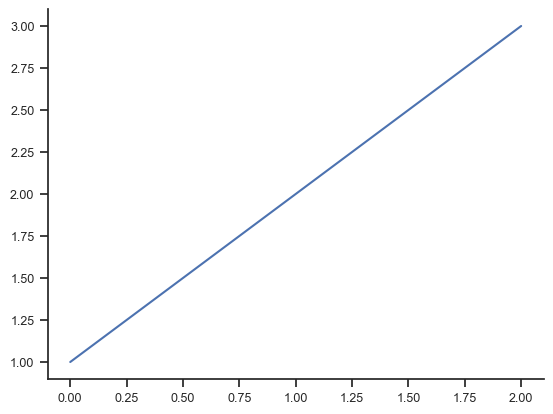

In [8]:
fig2, ax = plt.subplots()
ax.plot([1,2,3])
plt.show()

In [8]:
# %% D) seizure stats

from _analysis_.sz_analysis._ClassExpSeizureAnalysis import ExpSeizureAnalysis as main, ExpSeizureResults

# main.FOVszInvasionTime()
# main.calc__szInvasionTime()
# main.plot__sz_invasion()

ax, ax2, ax3, ax4 = axes['D'][0], axes['D'][1], axes['D'][2], axes['D'][3]

main.plot__sz_incidence(fig=fig, ax=ax, show=False)
main.plot__sz_lengths(fig=fig, ax=ax2, show=False)
main.plot__sz_propagation_speed(results=results_seizure, fig=fig, ax=ax3, show=False)



ax.set_ylabel(f'Ictal events / min', fontsize=fontsize_extraplot)
ax.set_yticks([0, 1], [0, 1], fontsize=fontsize_extraplot)
ax.set_title('')
ax2.set_title('')
ax2.set_ylabel('Length (secs)', fontsize=fontsize_extraplot)
ax2.set_yticks([0, 120], [0, 120], fontsize=fontsize_extraplot)
ax2.set_ylim([0, 120])
ax3.set_ylabel('Speed ($\mu$$\it{m}$/sec)', fontsize=fontsize_extraplot)
ax3.set_yticks([0, 40], [0, 40], fontsize=fontsize_extraplot)
ax3.set_ylim([0, 40])
rfv.add_label_axes(text='D', ax=axes['D'][0], x_adjust=0.07, y_adjust=0.03)


results = Suite2pROIsSzResults.load()

activity_rates = [[np.mean(i) for i in results.neural_activity_rate['baseline']], 
          [np.mean(i) for i in results.neural_activity_rate['interictal']],
          [np.mean(i) for i in results.neural_activity_rate['ictal']]]

pplot.plot_bar_with_points(
    data=[[np.mean(i) for i in results.neural_activity_rate['baseline']], 
          [np.mean(i) for i in results.neural_activity_rate['interictal']],
          [np.mean(i) for i in results.neural_activity_rate['ictal']]],
    bar=True, x_tick_labels=['Baseline', 'Interictal', 'Ictal'], points=False,
    colors=['cornflowerblue', 'forestgreen', 'purple'], lw=1.3,
    expand_size_x=0.4, title='Avg s2pROIs neural activity rate (** 1way ANOVA)', y_label='Neural activity rate', alpha=0.7,
    expand_size_y=1.2, ylims=[0, 200], 
    ax=ax4)

oneway_r = stats.f_oneway(*activity_rates)

print(f"1-way ANOVA  of baseline, interictal and ictal activity rates: {oneway_r.pvalue}")

# fig.show()

In [9]:
fig.show()


Loading Results Analysis object from /home/pshah/mnt/qnap/Analysis/analysis_export/analysis_quantification_classes/Results__Suite2pROIsSz.pkl ... 
1-way ANOVA  of baseline, interictal and ictal activity rates: 0.003138182564297373


/home/pshah/Documents/code/funcsforprajay/src/funcsforprajay/wrappers.py:109: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  kwargs['fig'].show()


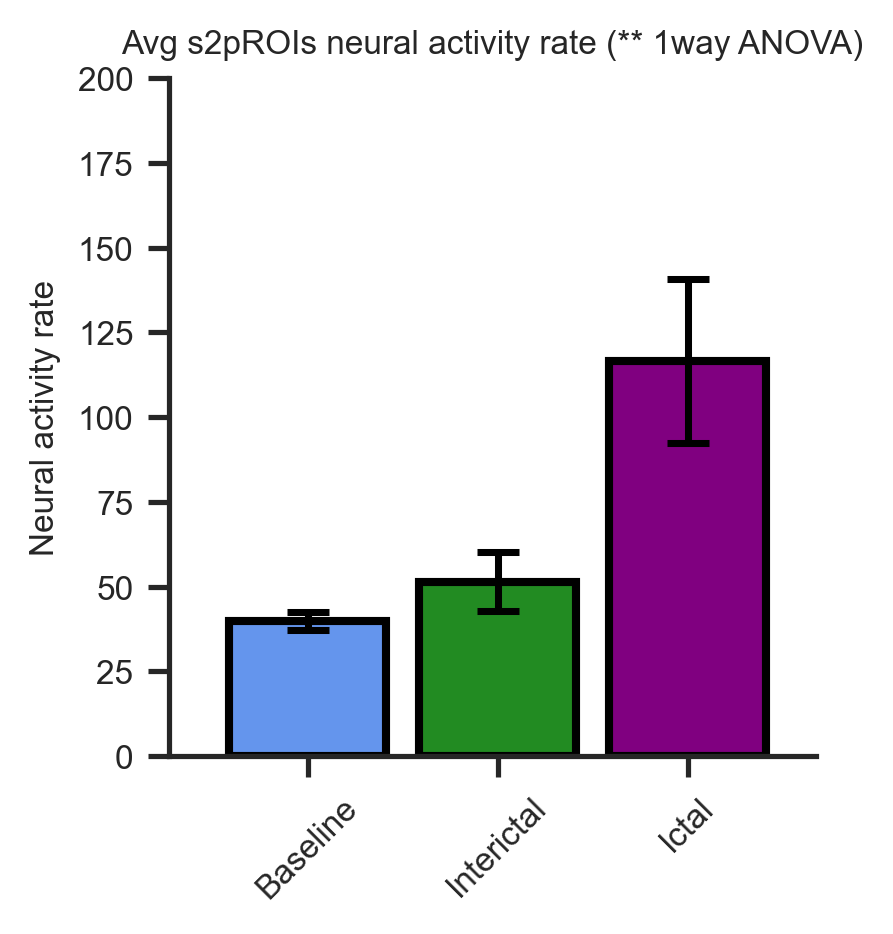